<a href="https://colab.research.google.com/github/PankajKumarBeniwal/Deep-Learning-Class/blob/master/Softmax_based_Logi_Regr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import all the necessary libararies 
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical

In [2]:
#Loading the mnist dataset and spliting it into train and test 
(x_train,y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
#Getting the size of test and train data
print("training data",x_train.shape, y_train.shape)
print("Testing data", x_test.shape, y_test.shape)

training data (60000, 28, 28) (60000,)
Testing data (10000, 28, 28) (10000,)


In [4]:
#Changing the shape of the train and test data
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [5]:
print("Training",x_train.shape, y_train.shape)
print("Testing", x_test.shape, y_test.shape)

Training (60000, 784) (60000,)
Testing (10000, 784) (10000,)


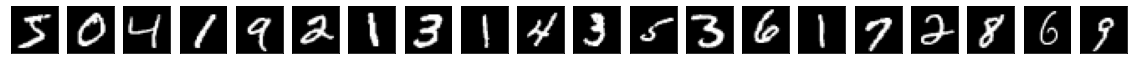

In [6]:
#Getting the data and showing few data 
n = 20
plt.figure(figsize = (20,4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_train[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


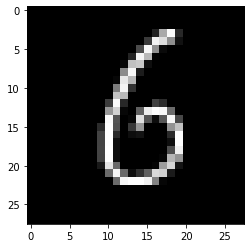

In [8]:
#Reshaping the images presented in the data
XX_train = x_train.astype('float32')/255.
XX_test = x_test.astype('float32')/255.
plt.imshow(XX_train[18].reshape(28,28))

In [9]:
#Categorising the dataon X and Y and reversing it
XX_train = XX_train.T
XX_test = XX_test.T
Y_train = to_categorical(y_train, num_classes = 50).T
Y_test = to_categorical(y_test, num_classes = 50).T

In [10]:
#Printing the reversed data
print("Training",XX_train.shape, Y_train.shape)
print("Testing", XX_test.shape, Y_test.shape)

Training (784, 60000) (10, 60000)
Testing (784, 10000) (10, 10000)


In [11]:
#Defining the softmax technique
def softmax(Z):
	expZ = np.exp(Z - np.max(Z))
	return expZ / expZ.sum(axis = 0, keepdims = True)

In [12]:
#Setting the parameters
def initialize_param(d):
    np.random.seed(1)
    w = np.random.randn(d,10)/np.sqrt(d)
    b = np.zeros((10,1))
    params = {'w':w, 'b':b}
    return params

In [13]:
def forward(params, X, Y):
    w = params['w']
    b = params['b']
    A = softmax(np.dot(w.T,X) + b)
    m = X.shape[1]
    cost = (-1/m)*np.sum(Y * np.log(A + 1e-8))
    return A, cost

In [14]:
def backprop(X, Y, A):
    m = X.shape[1]
    dw = (1/m)*np.dot(X,(A-Y).T)
    db = (1/m)*np.sum(A-Y)
    return dw, db


In [15]:
#optimizing the parameters
def optimize(params, X, Y, num_iterations, learning_rate):
    w = params['w']
    b = params['b']
    costs = []
    for i in range(num_iterations):
        A, cost = forward(params, X, Y)
        dw, db = backprop(X, Y, A)
        params['w'] = params['w'] - learning_rate*dw
        params['b'] = params['b'] - learning_rate*db
        if i%100 == 0:
            print('Cost on {} interation: Cost: {}, Normalised Weight: {}, Bias: {}'.format(i, cost, np.linalg.norm(dw), db))
        costs.append(cost)
    return params, costs

In [16]:
#setting the parameters shape
def predict(params, X):
    w = params['w']
    print(w.shape, X.shape)
    b = params['b']
    m = X.shape[1]
    A = softmax(np.dot(w.T,X) + b)
    return A

In [17]:
#Defining the model for the training 
def model(d, X_train, Y_train, X_test, Y_test, num_iter, learning_rate):
        params = initialize_param(d)
        print(params["w"].shape,"Parameter Weight Shape")
        params,costs = optimize(params, X_train, Y_train, num_iter, learning_rate)
        return params,costs

In [18]:
#starting the training 
params,costs = model(784, XX_train, Y_train, XX_test, Y_test, 1000, 0.1)

(784, 10) Parameter Weight Shape
Cost on 0 interation: Cost: 2.436488226563119, Normalised Weight: 1.1366058666201924, Bias: -2.8776980798284056e-17
Cost on 100 interation: Cost: 0.6140793499129977, Normalised Weight: 0.14731918378778483, Bias: 2.220446049250313e-18
Cost on 200 interation: Cost: 0.4934911939243358, Normalised Weight: 0.08265392383436176, Bias: 7.105427357601002e-19
Cost on 300 interation: Cost: 0.4445869523096169, Normalised Weight: 0.05938195955176011, Bias: 1.2434497875801753e-18
Cost on 400 interation: Cost: 0.4166164790036122, Normalised Weight: 0.0471843013929549, Bias: 4.440892098500626e-19
Cost on 500 interation: Cost: 0.3979535328842856, Normalised Weight: 0.03958973920139576, Bias: -3.552713678800501e-19
Cost on 600 interation: Cost: 0.38435610251548524, Normalised Weight: 0.03436324055036924, Bias: -7.105427357601002e-19
Cost on 700 interation: Cost: 0.3738704917424687, Normalised Weight: 0.030522324764162823, Bias: -1.8355687340469255e-18
Cost on 800 interat

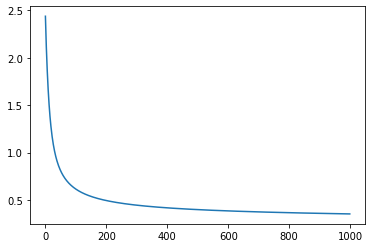

In [19]:
#plotting the gragh
plt.plot(range(len(costs)),costs)

In [20]:
#printing the accuracy of the trained model in training and testing phase
print("Training Accuracy: {}%".format(100 - np.mean(np.abs(predict(params,XX_train) - Y_train)) * 100))
print("Testing Accuracy: {}%".format(100 - np.mean(np.abs(predict(params,XX_test) - Y_test)) * 100))

(784, 10) (784, 60000)
Training Accuracy: 96.20347450041757 %
(784, 10) (784, 10000)
Testing Accuracy: 96.35049632816649 %
